In [1]:
import pandas as pd

# **EDA**

In [3]:
data = pd.read_csv("/content/data.csv")

In [4]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [5]:
data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [6]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [7]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [8]:
data.shape

(2000, 16)

In [9]:
data['customer_id'].nunique()

1999

In [10]:
data['phone_no'].nunique()

2000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

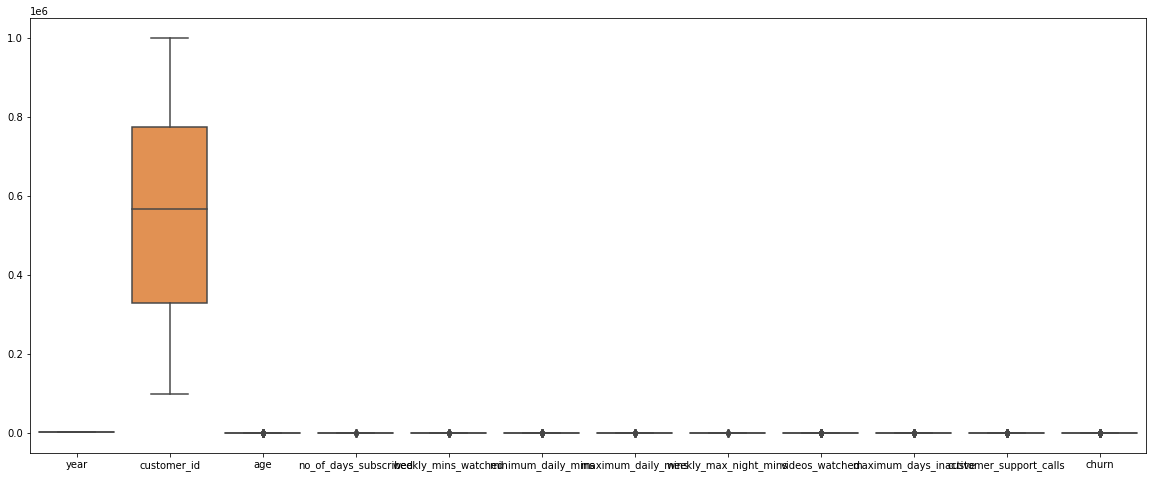

In [12]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data,width=0.8)
plt.show()

In [13]:
def stacked_plot(data, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (data.groupby([group, target]).size()/data.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

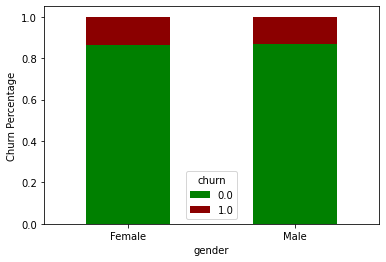

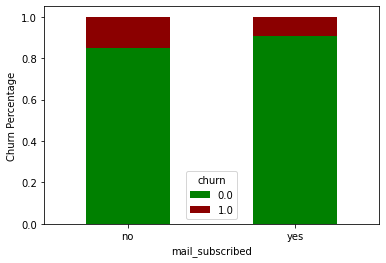

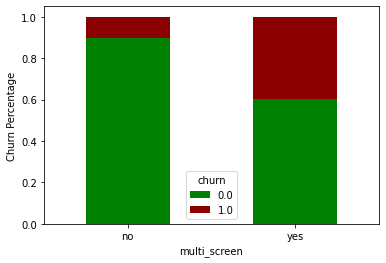

In [14]:
stacked_plot(data,'gender','churn')
stacked_plot(data,'mail_subscribed','churn')
stacked_plot(data,'multi_screen','churn')

Gender makes no difference in churn

Decided to drop these cols"year","customer_id","phone_no","gender"

In [15]:
data.drop(["year","customer_id","phone_no","gender"],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   no_of_days_subscribed   2000 non-null   int64  
 2   multi_screen            2000 non-null   object 
 3   mail_subscribed         2000 non-null   object 
 4   weekly_mins_watched     2000 non-null   float64
 5   minimum_daily_mins      2000 non-null   float64
 6   maximum_daily_mins      2000 non-null   float64
 7   weekly_max_night_mins   2000 non-null   int64  
 8   videos_watched          2000 non-null   int64  
 9   maximum_days_inactive   1972 non-null   float64
 10  customer_support_calls  2000 non-null   int64  
 11  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [17]:
data['mail_subscribed'].value_counts()

no     1430
yes     570
Name: mail_subscribed, dtype: int64

In [18]:
data['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

Type Conversion

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['mail_subscribed']=le.fit_transform(data['mail_subscribed'])
data['multi_screen']=le.fit_transform(data['multi_screen'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   no_of_days_subscribed   2000 non-null   int64  
 2   multi_screen            2000 non-null   int64  
 3   mail_subscribed         2000 non-null   int64  
 4   weekly_mins_watched     2000 non-null   float64
 5   minimum_daily_mins      2000 non-null   float64
 6   maximum_daily_mins      2000 non-null   float64
 7   weekly_max_night_mins   2000 non-null   int64  
 8   videos_watched          2000 non-null   int64  
 9   maximum_days_inactive   1972 non-null   float64
 10  customer_support_calls  2000 non-null   int64  
 11  churn                   1965 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 187.6 KB


In [21]:
data.isnull().sum()

age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

Filling Null values

In [22]:
x=data['maximum_days_inactive'].median()
data['maximum_days_inactive'].fillna(x,inplace=True)


In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [25]:
data['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [26]:
data['churn']=data['churn'].astype('int')

In [27]:
data.head()

,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,StandardScaler

Splitting Data

In [29]:
x=data.drop('churn',axis=1)
y=data['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [30]:
x_train.shape,y_train.shape

((1572, 11), (1572,))

In [31]:
x_test.shape,y_test.shape

((393, 11), (393,))

Scaling Data

In [32]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_scaled,columns=x_train.columns)
x_test_scale=ss.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scale,columns=x_test.columns)


In [33]:
x_train_scaled.head()

,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,-1.040477,-0.637206,-0.329551,-0.634286,0.219613,-0.292856,0.219112,-0.694159,0.586926,-0.308712,-0.410484
1,0.615117,0.236497,-0.329551,-0.634286,0.129915,0.858788,0.130074,0.319278,1.375852,0.935634,-0.410484
2,-1.137865,0.835607,-0.329551,-0.634286,0.240169,0.498899,0.239998,0.927340,-0.201999,0.935634,2.651348
3,0.225566,-0.287725,-0.329551,1.576575,-1.828495,-0.256867,-1.828770,-0.643487,-1.385387,-0.308712,1.120432
4,0.128178,-2.434537,-0.329551,1.576575,0.049560,-0.652745,0.049829,0.471293,-0.990925,-0.308712,-1.175942


In [34]:
x_test_scaled.head()

,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,-0.066598,1.459680,-0.329551,-0.634286,1.789331,-2.884056,1.788825,-1.099534,-0.201999,-2.797403,1.120432
1,0.030790,0.835607,-0.329551,1.576575,-0.483023,-0.400823,-0.483301,-0.542143,-0.201999,-0.308712,-0.410484
2,-1.137865,0.635904,-0.329551,-0.634286,1.380083,0.570877,1.379908,-1.606252,-0.990925,0.935634,0.354974
3,0.322954,0.036793,-0.329551,1.576575,-0.499841,2.046421,-0.499790,0.167262,0.192464,2.179979,-0.410484
4,0.030790,1.559532,-0.329551,-0.634286,-2.011629,0.570877,-2.011243,-0.491472,-0.990925,0.935634,0.354974


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

# **Logistic** **Regression**

In [36]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
pred=lr.predict(x_test_scaled)
train_pred=lr.predict(x_train_scaled)
error=mean_squared_error(y_test,pred)
acc= accuracy_score(y_test,pred)
train_acc=accuracy_score(y_train,train_pred)


In [37]:
train_acc,acc,error

(0.871501272264631, 0.8625954198473282, 0.13740458015267176)

# **DecisionTreeClassifier**

In [38]:
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
train_pred=dt.predict(x_train_scaled)
pred=dt.predict(x_test_scaled)
acc= accuracy_score(y_test,pred)
train_acc=accuracy_score(y_train,train_pred)

In [39]:
train_acc,acc

(1.0, 0.8854961832061069)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# **RandomForestClassifier**


In [41]:
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
train_pred=rf.predict(x_train_scaled)
pred=rf.predict(x_test_scaled)
acc= accuracy_score(y_test,pred)
train_acc=accuracy_score(y_train,train_pred)

In [42]:
train_acc,acc

(1.0, 0.9211195928753181)

# **Hyperparameter Tuning**

In [43]:
param_grid2 = {'max_features':['auto'],
          'n_estimators':[1000],
           'criterion': ['entropy'],    
          'max_depth': [10],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [44]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=1000)

In [45]:
grid.best_score_

0.6435879307962976

# **Final Model**

In [46]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)
model.fit(x_train_scaled,y_train)
train_pred=model.predict(x_train_scaled)
pred=model.predict(x_test_scaled)
acc= accuracy_score(y_test,pred)
train_acc=accuracy_score(y_train,train_pred)

In [47]:
train_acc,acc

(0.9694656488549618, 0.9236641221374046)

Accuracy Score: 0.924
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       349
           1       0.63      0.75      0.69        44

    accuracy                           0.92       393
   macro avg       0.80      0.85      0.82       393
weighted avg       0.93      0.92      0.93       393



Text(0.5, 442.81090909090915, 'Predicted Values')

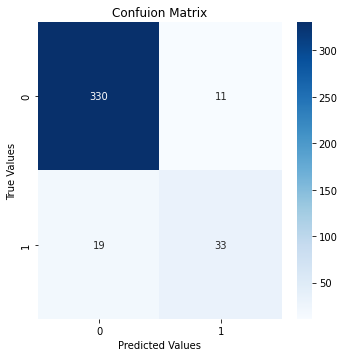

In [48]:
print('Accuracy Score:', round(accuracy_score(pred,y_test),3))
print("--"*30)
print(classification_report(pred,y_test))


conf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')